In [1]:
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
stations = pd.read_csv( 'NODESLatLon.csv', index_col=1)
stations.head()

,Unnamed: 0,lat,lon
nodes,,,
PUDUCHERRY,0,11.913860,79.814472
SAWANTWADIROAD,1,15.960111,74.191934
DHAKA,2,23.810332,90.412518
KURSEONG,3,26.882138,88.278851
VISAKHAPATNAM,4,17.686816,83.218481


In [3]:
Railways = nx.Graph()
Railways.add_nodes_from(stations.index)

In [4]:
Pos={}
for c in stations.index:
    Pos[c]=(stations['lon'][c],stations['lat'][c])
type(Pos[c][1])

numpy.float64

In [5]:
Pos

{'ABOHAR': (74.199304299999994, 30.1452928),
 'ADILABAD': (78.532010700000001, 19.664062399999999),
 'ADRSHNGRDELHI': (77.170222999999993, 28.716557000000002),
 'AGRACANTT': (77.989924400000007, 27.157815200000002),
 'AGRAFORT': (78.023819700000004, 27.179202000000004),
 'AHMEDABADJN': (72.600875200000004, 23.026748300000001),
 'AHMEDABADMG': (72.494585999999998, 23.017406000000001),
 'AISHBAGH': (80.908675700000003, 26.836185799999999),
 'AJMERJN': (78.501595599999987, 17.4337397),
 'AJNI': (79.083129200000002, 21.1277078),
 'AKOLAJN': (77.005705899999995, 20.723338800000001),
 'ALIPURDUARJN': (89.531812400000007, 26.548740299999999),
 'ALLAHABADCITY': (81.846311, 25.435801100000003),
 'ALLAHABADJN': (81.82595529999999, 25.4455992),
 'ALLEPPEY': (76.338848400000003, 9.498066699999999),
 'AMBALACANTJN': (76.848546799999994, 30.361031400000002),
 'AMBANDAURA': (76.1102463, 31.670387300000002),
 'AMBIKAPUR': (83.181785599999998, 23.1354921),
 'AMRAVATI': (77.779551299999994, 20.937423800

In [6]:
links = pd.read_csv( 'paths.csv', index_col =None)
links.head()

,Unnamed: 0,train,source,dest,dist
0,0,NTV DURG EXP,NAUTANWA,DURG,1152
1,1,SOUTH BIHAR EXP,RAJENDRANAGAR T,DURG,1113
2,2,IPR RJPB EXPRES,ISLAMPUR,RAJENDRANAGAR T,63
3,3,JU MBF LINK EXP,BHAGAT KI KOTHI,MUNABAO,325
4,4,UDHYOGKARMI EXP,KANPUR CENTRAL,VALSAD,1305


In [7]:
EN=len(links.index)
edgelist=[0]*EN
for j in range(0,EN):
    edgelist[j]=(links['source'][j],links['dest'][j])

In [8]:
Railways.add_edges_from(edgelist)

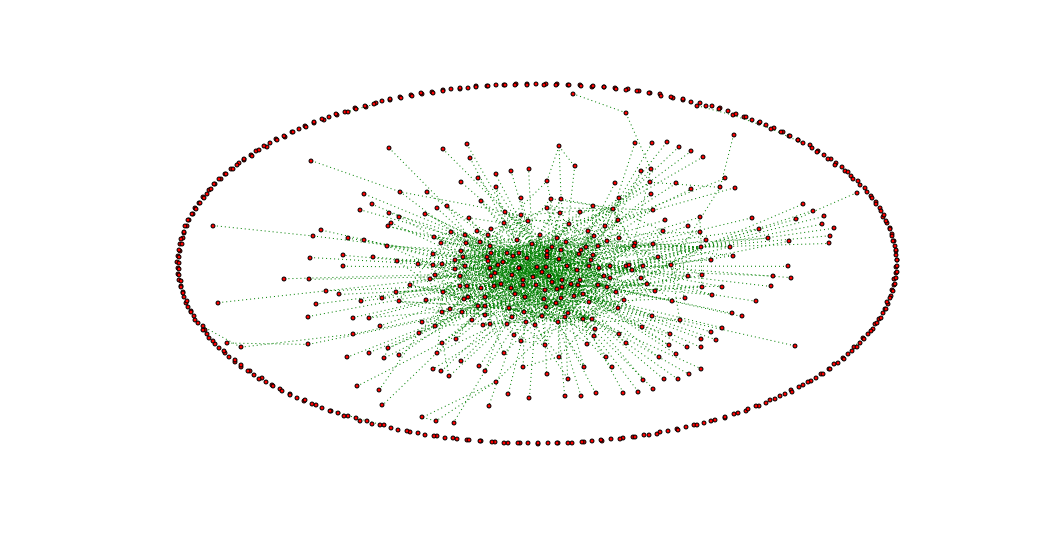

In [9]:
plt.figure(figsize = (14,7))
nx.draw(Railways,with_labels=False,node_size=15,style='dotted',edge_color='green')

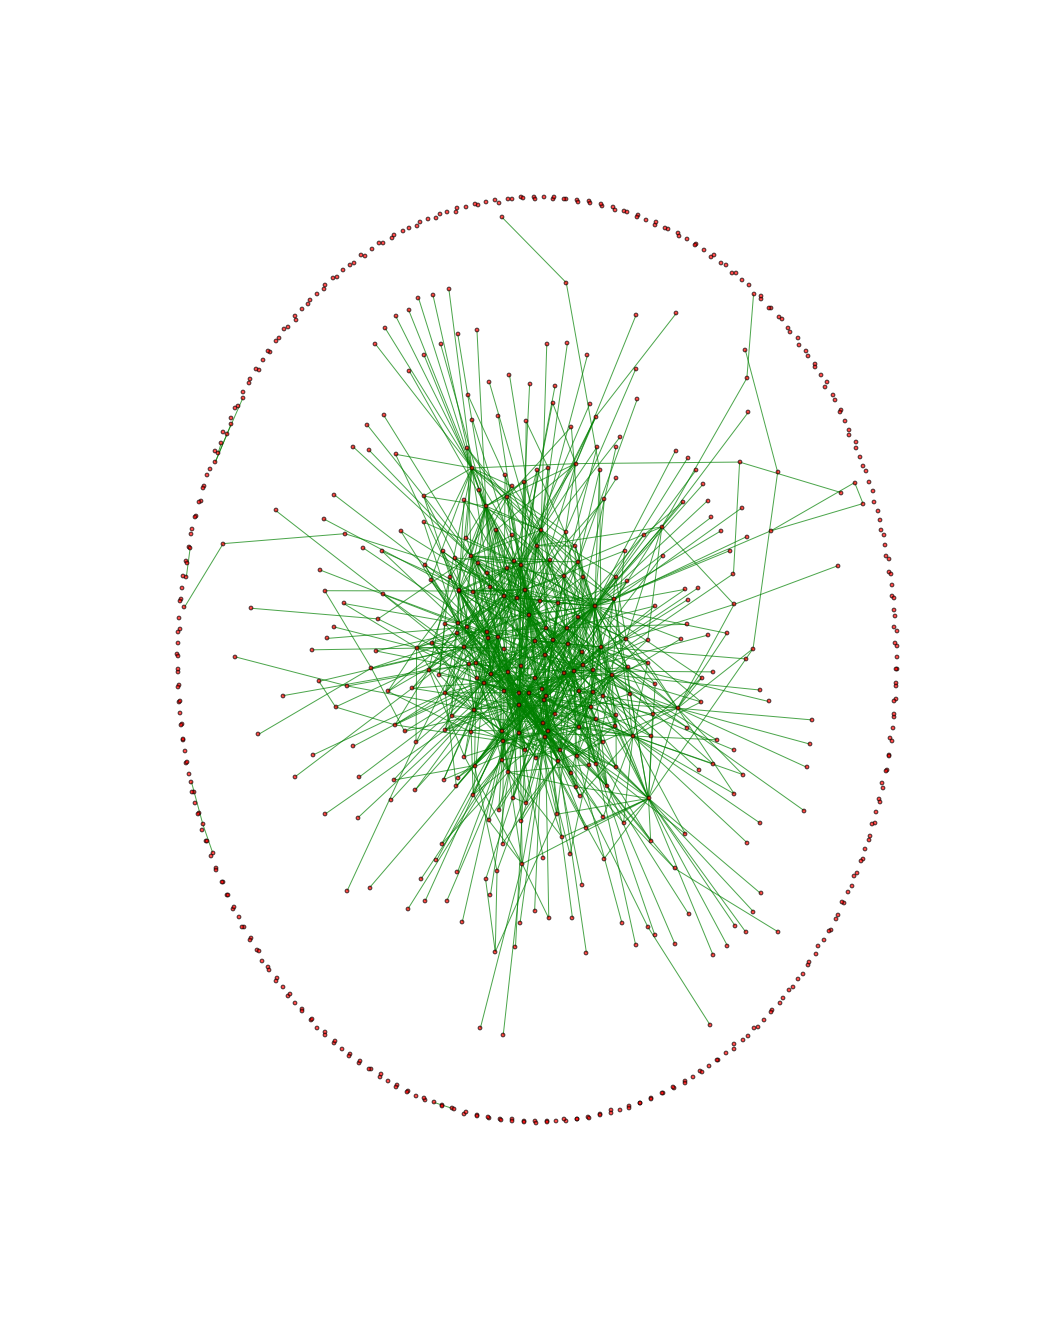

In [10]:
plt.figure(figsize = (14,18))
nx.draw(Railways, with_labels = False, alpha = 0.7, font_size = 18, 
        node_size = 14, font_color = 'r',edge_color = 'g')

In [11]:
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [12]:
c1= nx.degree(Railways)
topdict(c1,10)

1|HOWRAH JN      :68
2|NEW DELHI      :48
3|LOKMANYATILAK T:46
4|CHENNAI CENTRAL:42
5|YESVANTPUR JN  :39
6|MUMBAI CST     :33
7|SECUNDERABAD JN:33
8|PUNE JN        :32
9|AHMEDABAD JN   :32
10|JAMMU TAWI     :31


In [13]:
c2= nx.eigenvector_centrality(Railways)
topdict(c2,10)

1|HOWRAH JN      :0.275537608356
2|CHENNAI CENTRAL:0.224605603293
3|NEW DELHI      :0.213185871053
4|LOKMANYATILAK T:0.199095152892
5|AHMEDABAD JN   :0.186247832509
6|YESVANTPUR JN  :0.182536009486
7|H NIZAMUDDIN   :0.168627184889
8|PUNE JN        :0.167644648161
9|JAMMU TAWI     :0.160335209813
10|PURI           :0.159575707362


In [14]:
nx.number_connected_components(Railways)

356

In [15]:
FLC=sorted(nx.connected_components(Railways), key=len, reverse=True)

In [16]:
RCG=list(nx.connected_component_subgraphs(Railways, copy=True))[0]
c3 = nx.current_flow_betweenness_centrality(RCG)
topdict(c3,10)

1|HOWRAH JN      :0.179544117088
2|NEW DELHI      :0.109405168355
3|LOKMANYATILAK T:0.10671055416
4|CHENNAI CENTRAL:0.0989476319242
5|DELHI          :0.0914095173906
6|SECUNDERABAD JN:0.0812762066318
7|YESVANTPUR JN  :0.0811661014901
8|CHENNAI EGMORE :0.0777487821477
9|MUMBAI CST     :0.0767572137171
10|TIRUPATI       :0.0668442859339


In [17]:
c4 = nx.closeness_centrality(RCG)
topdict(c4,10)

1|HOWRAH JN      :0.472727272727
2|CHENNAI CENTRAL:0.451871657754
3|LOKMANYATILAK T:0.446499339498
4|NEW DELHI      :0.445910290237
5|AHMEDABAD JN   :0.434447300771
6|YESVANTPUR JN  :0.428390367554
7|JAMMU TAWI     :0.425692695214
8|SECUNDERABAD JN:0.425692695214
9|PURI           :0.423558897243
10|MUMBAI CST     :0.420921544209


In [18]:
c5 = nx.pagerank(Railways,0.85)
topdict(c5,10)

1|HOWRAH JN      :0.0242482660709
2|NEW DELHI      :0.0163480380017
3|LOKMANYATILAK T:0.015593676791
4|CHENNAI CENTRAL:0.013995527402
5|YESVANTPUR JN  :0.0126515785565
6|SECUNDERABAD JN:0.011746120826
7|DELHI          :0.0116400894527
8|MUMBAI CST     :0.0111076076025
9|CHENNAI EGMORE :0.0102603877509
10|PUNE JN        :0.010174658965


In [19]:
def visualize_path(path, graph):
    plt.figure(figsize = (14,18))
    nx.draw(graph, pos = IntPos, with_labels = True, alpha = 0.4, font_size = 18, 
            node_size = 0, font_color = 'r', edge_color = 'g')
    x=[IntPos[v][0] for v in path]
    y=[IntPos[v][1] for v in path]
    plt.plot(x,y,'bo-', lw = 7)
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=14)

In [20]:
shrtpath_a = nx.shortest_path(Railways, Railways.nodes()[1], Railways.nodes()[20])
print len(shrtpath_a)

NetworkXNoPath: No path between KURSEONG        and VELLANKANNI.

In [ ]:
visualize_path(shrtpath_a, Railways)